# Support-vector machines (SVMs) for Classification

## Classification basics

In many data science practices, we are interested in different *classification* question in the form of "which one":

* Does this email belong in the spam folder or the inbox?
* Is this customer more likely *to sign up* or *not to sign up* for a subscription service?
* Does this image depict a donkey, a dog, a cat, or a rooster?
* Which movie is a Netflix user most likely to watch next?

As shown in following figure, in *classification* we aim to find a function or model which is able to assign an object into of the the $k$ predefined class labels based on the features $\mathrm x=[x_1, x_2, ..., x_d]$.

![Classfication.](https://raw.githubusercontent.com/binbenliu/Teaching/main/DataMining/classification.png)


In machine learning, *classification* refers to describe two subtly different problems: 
* (i) those where we are interested only in hard assignments of examples to categories (classes), for example decision trees; and 
* (ii) those where we wish to make soft assignments, i.e., to assess the probability that each category applies, for example, logistic regression. 

The distinction tends to get blurred, in part, because often, even when we only care about hard assignments, we still use models that make soft assignments.

##  Support-vector machines (SVMs)

Support-vector machines (SVMs) are a set of supervised learning models for classification and regression analysis, though our fucus is classification. We are given a training dataset of ${\displaystyle n}$ points of the form

$${\displaystyle (\mathbf {x} _{1},y_{1}),\ldots ,(\mathbf {x} _{n},y_{n}),}$$
where the ${\displaystyle y_{i}}$ are either 1 or −1, each indicating the class to which the point ${\displaystyle \mathbf {x} _{i}}$ belongs. Each $\mathbf {x} _{i}$ is a $p$-dimensional real vector. 

In SVMs, we want to find the "maximum-margin hyperplane" that divides the group of points $\mathbf {x} _{i}$ for which ${\displaystyle y_{i}=1}$ from the group of points for which ${\displaystyle y_{i}=-1}$, which is defined so that the distance between the hyperplane and the nearest point $\mathbf {x} _{i}$ from either group is maximized. As shown in following figure, a hyperplane can be written as the set of points $\mathbf {x}$  satisfying
$${\displaystyle \mathbf {w} ^{T}\mathbf {x} +b=0,}$$
where $\mathbf {w}$  is the  normal vector to the hyperplane.

**Please check lecture slides for more details.**

![SVM.](https://raw.githubusercontent.com/binbenliu/Teaching/main/DataMining/svm.png)


 ## 2.  Loss Function

For support vector machine, the model parameters $(\mathbf {w}, b)$ are obtained through the optimization problem as follows

\begin{align}
& {\displaystyle {\text{minimize }}    \frac{1}{2} \|\mathbf {w} \|^{2}} + C \sum _{i=1}^{n}\zeta _{i}\\
& {\displaystyle {\text{subject to }}  y_{i}(\mathbf {w} ^{T}\mathbf {x} _{i}-b)\geq 1-\zeta _{i}\,{\text{ and }}\,\zeta _{i}\geq 0,\,{\text{for all }}i.}
\end{align}


## 3.  Find the best parameters  (**optional, you donot need to know the details in this part in this class**)



Solving alove optimization, it turns out that solution can be expressed as linear combination of training points:  $\mathbf {w}=\sum_{i=1}^{n}\alpha_i y_i \mathbf {x}_i$ with very few non-zero $\alpha_i$. The corresponding $\mathbf {x}_i$ are called support vectors (hence the strange name). Then we have 
$$f(\mathbf {x}) = \mathbf {w} ^{T}\mathbf {x} +b = \sum_{i=1}^{n}\alpha_i y_i \mathbf {x}_i^T \mathbf {x} + b$$

## 4. Nonlinear SVM

In nonlinear SVM, we have a mapping $\mathbf {x} \to \Phi(\mathbf {x})$ to transform the data into a higher-dimensional (possibly infinite) space via a mapping. Then we try to separate them linearly in that space, instead of the original one. Then we have 
$$f(\mathbf {x}) =  \sum_{i=1}^{n}\alpha_i y_i \Phi(\mathbf {x})_i^T \Phi(\mathbf {x}) + b$$

Turns out that, if we’re only using inner products in the original space, we do not need to construct this mapping explicitly!
Instead, it suffices to define a kernel 
$$\Phi(\mathbf {x})_i^T \Phi(\mathbf {x})_j= \mathcal K(\mathbf {x}_i, \mathbf {x}_j)$$

The kernel function can be any of the following:

* Linear: $\mathcal K(\mathbf {x}_i, \mathbf {x}_j) = \mathbf {x}_i^T \mathbf {x}_j$.

* Polynomial: $\mathcal K(\mathbf {x}_i, \mathbf {x}_j) = (\gamma \mathbf {x}_i^T \mathbf {x}_j +r)^d$, where $d$ is specified by parameter degree.

* RBF (Radial basis function): $\mathcal K(\mathbf {x}_i, \mathbf {x}_j) = \mathbf {x}_i^T \mathbf {x}_j=\exp (-\gamma ||\mathbf {x}_i - \mathbf {x}_j||^2)$, where  is specified by parameter gamma, must be greater than 0.

* Sigmoid: $\mathcal K(\mathbf {x}_i, \mathbf {x}_j) = \tanh (\gamma \mathbf {x}_i^T \mathbf {x}_j +r)$



## 5. Model Prediction and Evaluation

After training the SVM, given any example features,
we can predict the label output class.




# Support-vector machines (SVMs) with  with scikit-learn

In real practice, you do not need to SVM models by yourself from scratch. 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)




In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## Demo

We consider a two-dimensional dataset containing 1500 labeled instances, each of which is assigned to one of two classes, 0 or 1. Instances from each class are generated as follows:
Instances from class 1 are generated from a mixture of 3 Gaussian distributions, centered at [6,14], [10,6], and [14 14], respectively. Instances from class 0 are generated from a uniform distribution in a square region, whose sides have a length equals to 20. For simplicity, both classes have equal number of labeled instances. The code for generating and plotting the data is shown below. All instances from class 1 are shown in red while those from class 0 are shown in black.

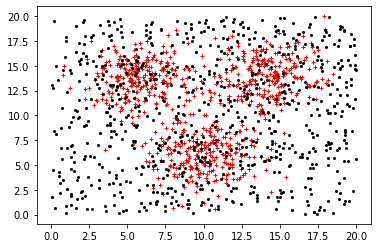

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random

%matplotlib inline

N = 1500

mean1 = [6, 14]
mean2 = [10, 6]
mean3 = [14, 14]
cov = [[3.5, 0], [0, 3.5]]  # diagonal covariance

np.random.seed(50)
X = np.random.multivariate_normal(mean1, cov, int(N/6))
X = np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/6))))
X = np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/6))))
X = np.concatenate((X, 20*np.random.rand(int(N/2),2)))
Y = np.concatenate((np.ones(int(N/2)),np.zeros(int(N/2))))

plt.plot(X[:int(N/2),0],X[:int(N/2),1],'r+',X[int(N/2):,0],X[int(N/2):,1],'k.',ms=4)

In this example, we reserve 80% of the labeled data for training and the remaining 20% for testing. We then fit decision trees of different maximum depths (from 2 to 50) to the training set and plot their respective accuracies when applied to the training and test sets.

In [2]:
#########################################
# Training and Test set creation
#########################################

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [3]:
# Plotting decision regions
def plot_desicion_boundary(X, y, clf, title = None):
    '''
    Helper function to plot the decision boundary for the SVM
    '''
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize = (10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    
    if title is not None:
        plt.title(title)
    
    # highlight the support vectors
    #plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
    #            facecolors='none', zorder=10)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

### linear SVM 

Text(0, 0.5, 'Accuracy')

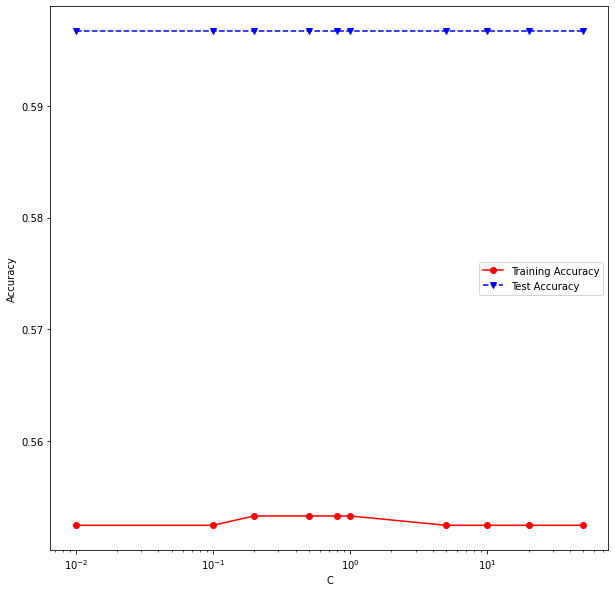

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

SVMtrainAcc = []
SVMtestAcc = []

for param in C:
  
    clf = SVC(C=param,kernel='linear')
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    SVMtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(Y_test, Y_predTest))

fig,  ax = plt.subplots(1, 1, figsize=(10,10))

ax.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
ax.legend(['Training Accuracy','Test Accuracy'])
ax.set_xlabel('C')
ax.set_xscale('log')
ax.set_ylabel('Accuracy')

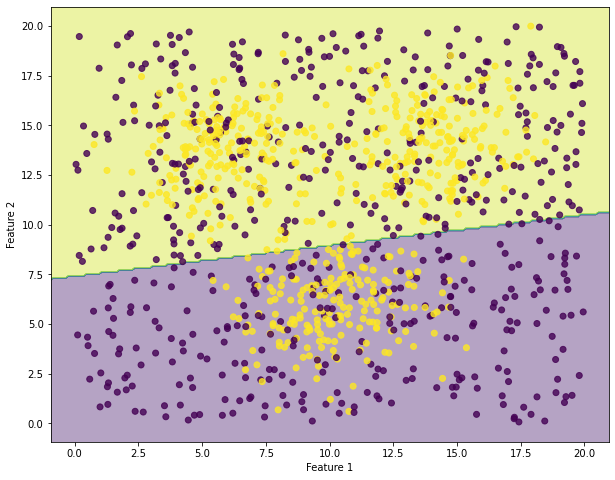

In [5]:
plot_desicion_boundary(X_train, Y_train, clf)

### Nonlinear Support Vector Machine

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

* kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
Specifies the kernel type to be used in the algorithm. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape

More details: https://scikit-learn.org/stable/modules/svm.html#svm-kernels

Text(0, 0.5, 'Accuracy')

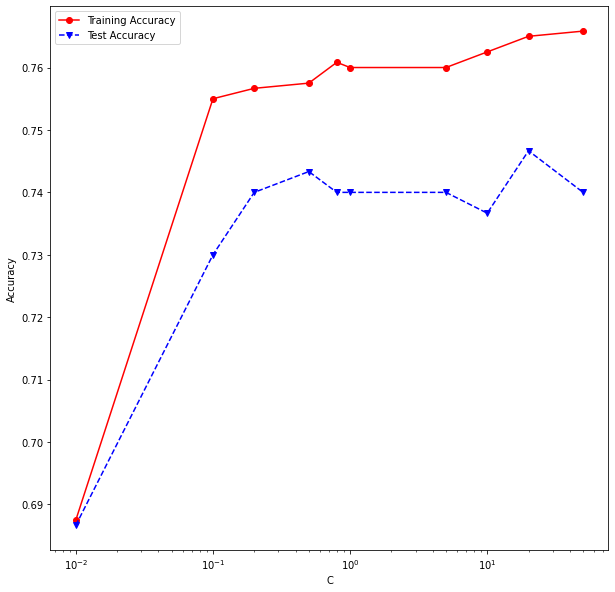

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf = SVC(C=param,kernel='rbf',gamma='scale')
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    SVMtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(Y_test, Y_predTest))

fig,  ax = plt.subplots(1, 1, figsize=(10, 10))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')

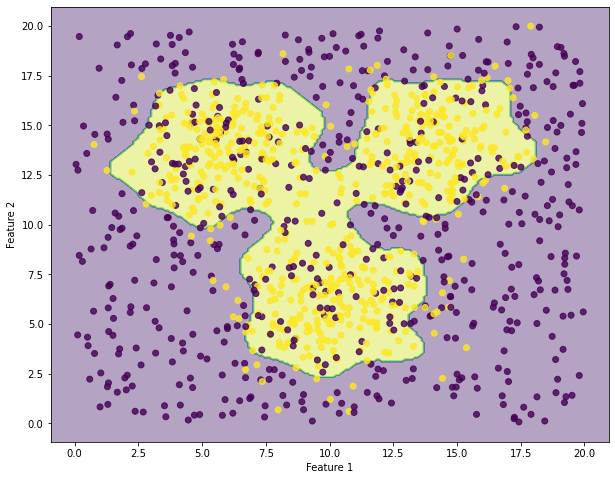

In [7]:
clf = SVC(C=1.0,kernel='rbf',gamma='auto')
clf.fit(X_train, Y_train)


plot_desicion_boundary(X_train, Y_train, clf)

## predict and evaluate

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

Y_pred = clf.predict(X_test)


print('Accuracy on test data is %.2f' % (accuracy_score(Y_test, Y_pred)))
print('Precision on test data is %.2f' % precision_score(Y_test, Y_pred) )
print('Recall on test data is %.2f' % recall_score(Y_test, Y_pred) )
print('F1_score on test data is %.2f' % f1_score(Y_test, Y_pred) )

Accuracy on test data is 0.73
Precision on test data is 0.69
Recall on test data is 0.85
F1_score on test data is 0.76


## Demo 2

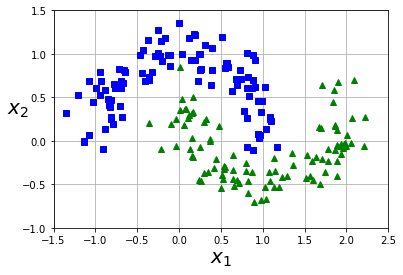

In [8]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [11]:
X, y = make_moons(n_samples=200, noise=0.15, random_state=42)
X

array([[-1.07816119e+00,  6.33677205e-02],
       [ 9.39808593e-01,  4.57119499e-01],
       [ 6.95151435e-01,  6.42107065e-01],
       [ 1.15017340e+00, -3.47871030e-01],
       [ 2.49173156e-01, -6.85441065e-02],
       [ 3.21945347e-01,  2.50622341e-01],
       [-7.12153032e-01,  8.26110194e-01],
       [ 1.53159481e+00, -1.57287449e-01],
       [ 1.95746563e+00, -8.16557590e-02],
       [ 1.43686490e-01,  9.34990547e-01],
       [-4.02636990e-01,  6.82594373e-01],
       [ 1.93843382e+00, -1.50881031e-01],
       [ 1.56535331e+00, -4.05593970e-01],
       [-8.44292755e-01,  4.85332130e-01],
       [ 1.86259670e+00,  1.82487734e-01],
       [ 1.92262353e+00, -6.38203855e-02],
       [-2.23689403e-04,  1.35967685e+00],
       [ 1.03057631e+00, -5.27734784e-01],
       [-1.07398963e+00,  6.92286480e-01],
       [-3.59010542e-01,  7.02497931e-01],
       [ 3.68912089e-01, -7.51839194e-03],
       [ 9.07792617e-01,  6.13306951e-01],
       [ 9.78643036e-01, -6.81395573e-01],
       [-8.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1)

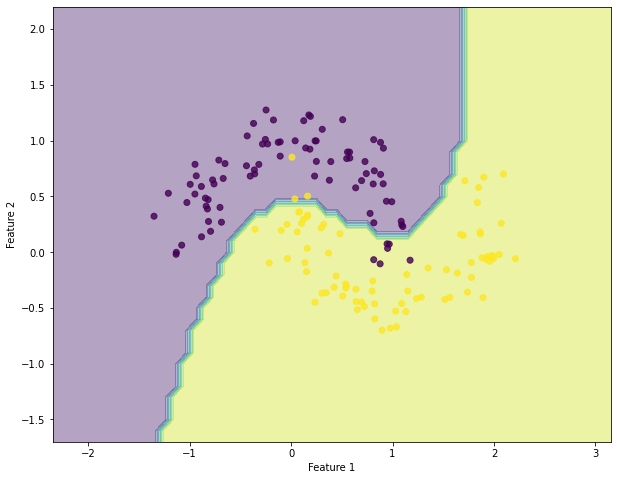

In [12]:
clf = SVC(C=1.0,kernel='rbf',gamma='auto')
clf.fit(X_train, Y_train)


plot_desicion_boundary(X_train, Y_train, clf)